In [57]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

Importing Needed Libraries

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Preprocessing & EDA

In [60]:
df = pd.read_csv('weather.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [61]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


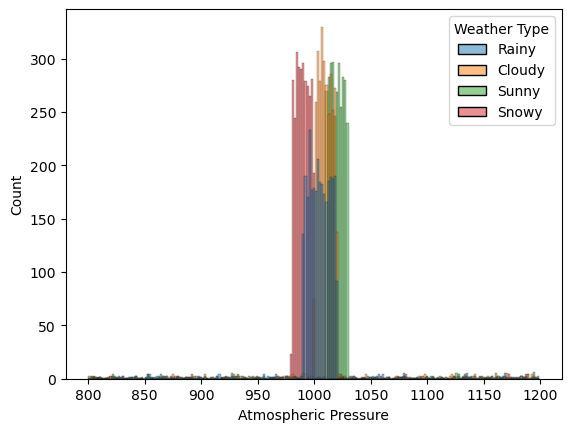

In [62]:
sns.histplot(data=df , x= df['Atmospheric Pressure'] , hue=df['Weather Type'])
plt.show()

In [63]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Features Encoding

In [64]:
df['Cloud Cover'].value_counts()

overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: Cloud Cover, dtype: int64

In [65]:
l_encoder = LabelEncoder()
df['Cloud Cover'] = l_encoder.fit_transform(df['Cloud Cover'])
df['Cloud Cover'].value_counts()

2    6090
3    4560
0    2139
1     411
Name: Cloud Cover, dtype: int64

In [66]:
df['Location'].value_counts()

inland      4816
mountain    4813
coastal     3571
Name: Location, dtype: int64

In [67]:
location_dummies = pd.get_dummies(df['Location'],prefix='Location')
# dummies.head()
df_encoded =  pd.concat([location_dummies,df] , axis=1)
df_encoded = df_encoded.drop('Location',axis=1)
df_encoded.head()

,Location_coastal,Location_inland,Location_mountain,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type
0,0,1,0,14.0,73,9.5,82.0,3,1010.82,2,Winter,3.5,Rainy
1,0,1,0,39.0,96,8.5,71.0,3,1011.43,7,Spring,10.0,Cloudy
2,0,0,1,30.0,64,7.0,16.0,0,1018.72,5,Spring,5.5,Sunny
3,1,0,0,38.0,83,1.5,82.0,0,1026.25,7,Spring,1.0,Sunny
4,0,0,1,27.0,74,17.0,66.0,2,990.67,1,Winter,2.5,Rainy


In [68]:
season_dummies = pd.get_dummies(df['Season'] , prefix='Season')
df_encoded2 = pd.concat([season_dummies,df_encoded],axis=1)
df_encoded2 = df_encoded2.drop('Season',axis=1)
df_encoded2.head()

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,0,0,0,1,0,1,0,14.0,73,9.5,82.0,3,1010.82,2,3.5,Rainy
1,0,1,0,0,0,1,0,39.0,96,8.5,71.0,3,1011.43,7,10.0,Cloudy
2,0,1,0,0,0,0,1,30.0,64,7.0,16.0,0,1018.72,5,5.5,Sunny
3,0,1,0,0,1,0,0,38.0,83,1.5,82.0,0,1026.25,7,1.0,Sunny
4,0,0,0,1,0,0,1,27.0,74,17.0,66.0,2,990.67,1,2.5,Rainy


In [69]:
df['Weather Type'].value_counts()

Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: Weather Type, dtype: int64

In [70]:
df_encoded2['Weather Type'] = l_encoder.fit_transform(df_encoded2['Weather Type'])
df_encoded2['Weather Type'].value_counts()

1    3300
0    3300
3    3300
2    3300
Name: Weather Type, dtype: int64

In [71]:
df_encoded2.head()

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,0,0,0,1,0,1,0,14.0,73,9.5,82.0,3,1010.82,2,3.5,1
1,0,1,0,0,0,1,0,39.0,96,8.5,71.0,3,1011.43,7,10.0,0
2,0,1,0,0,0,0,1,30.0,64,7.0,16.0,0,1018.72,5,5.5,3
3,0,1,0,0,1,0,0,38.0,83,1.5,82.0,0,1026.25,7,1.0,3
4,0,0,0,1,0,0,1,27.0,74,17.0,66.0,2,990.67,1,2.5,1


In [72]:
data = df_encoded2
data.head()

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,0,0,0,1,0,1,0,14.0,73,9.5,82.0,3,1010.82,2,3.5,1
1,0,1,0,0,0,1,0,39.0,96,8.5,71.0,3,1011.43,7,10.0,0
2,0,1,0,0,0,0,1,30.0,64,7.0,16.0,0,1018.72,5,5.5,3
3,0,1,0,0,1,0,0,38.0,83,1.5,82.0,0,1026.25,7,1.0,3
4,0,0,0,1,0,0,1,27.0,74,17.0,66.0,2,990.67,1,2.5,1


Correction Outliers  (Removing only outliers that affect on model performance)

In [73]:
#  data['Temperature'].describe()    # there is otliers
#  data['Visibility (km)'].describe()  #there is outliers
# data['Wind Speed'].describe()       #there is outliers but this feature not clearly  affect on target
                                         #so we don't remove these outliers that not affect on model perfrmance
data['Atmospheric Pressure'].describe() # there is a large outliers
# data['UV Index'].describe()

count    13200.000000
mean      1005.827896
std         37.199589
min        800.120000
25%        994.800000
50%       1007.650000
75%       1016.772500
max       1199.210000
Name: Atmospheric Pressure, dtype: float64

In [74]:
seventy_fifth_tempreture = data['Temperature'].quantile(.75)
twenty_fifth_tempreture = data['Temperature'].quantile(.25)
iqr_tempreture = seventy_fifth_tempreture - twenty_fifth_tempreture

upper = seventy_fifth_tempreture+(1.5*iqr_tempreture)
lower = twenty_fifth_tempreture - (1.5*iqr_tempreture)

In [75]:
outliers =data[(data['Temperature']<lower)|(data['Temperature']>upper)]\
 [['Season_Autumn','Season_Spring','Season_Summer','Season_Winter','Location_coastal',
   'Location_inland',
   'Location_mountain','Temperature','Humidity','Wind Speed','Precipitation (%)'
   ,'Cloud Cover','Atmospheric Pressure','UV Index','Visibility (km)','Weather Type']]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 210 to 13108
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season_Autumn         92 non-null     uint8  
 1   Season_Spring         92 non-null     uint8  
 2   Season_Summer         92 non-null     uint8  
 3   Season_Winter         92 non-null     uint8  
 4   Location_coastal      92 non-null     uint8  
 5   Location_inland       92 non-null     uint8  
 6   Location_mountain     92 non-null     uint8  
 7   Temperature           92 non-null     float64
 8   Humidity              92 non-null     int64  
 9   Wind Speed            92 non-null     float64
 10  Precipitation (%)     92 non-null     float64
 11  Cloud Cover           92 non-null     int32  
 12  Atmospheric Pressure  92 non-null     float64
 13  UV Index              92 non-null     int64  
 14  Visibility (km)       92 non-null     float64
 15  Weather Type        

In [76]:
# data.info()
no_outlier = data[(data['Temperature']>lower) & (data['Temperature']<upper)]
no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 13199
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season_Autumn         13108 non-null  uint8  
 1   Season_Spring         13108 non-null  uint8  
 2   Season_Summer         13108 non-null  uint8  
 3   Season_Winter         13108 non-null  uint8  
 4   Location_coastal      13108 non-null  uint8  
 5   Location_inland       13108 non-null  uint8  
 6   Location_mountain     13108 non-null  uint8  
 7   Temperature           13108 non-null  float64
 8   Humidity              13108 non-null  int64  
 9   Wind Speed            13108 non-null  float64
 10  Precipitation (%)     13108 non-null  float64
 11  Cloud Cover           13108 non-null  int32  
 12  Atmospheric Pressure  13108 non-null  float64
 13  UV Index              13108 non-null  int64  
 14  Visibility (km)       13108 non-null  float64
 15  Weather Type       

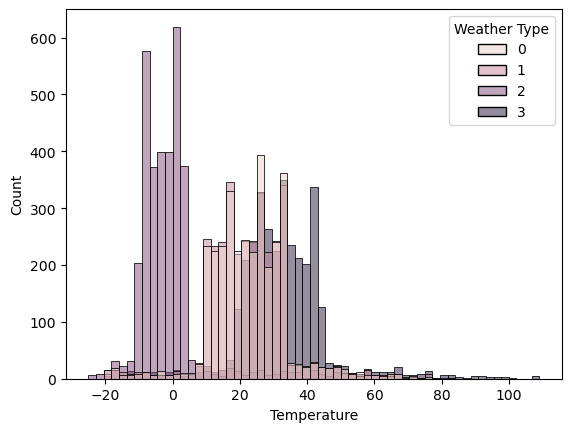

In [77]:
sns.histplot(data=data , x= data['Temperature'] , hue=data['Weather Type'])
plt.show()

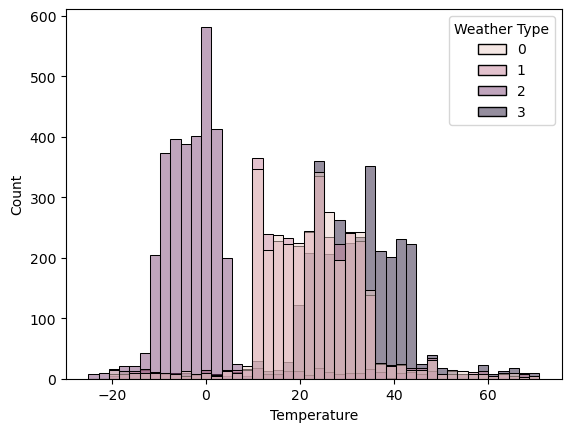

In [78]:
sns.histplot(data=no_outlier , x= no_outlier['Temperature'] , hue=no_outlier['Weather Type'])
plt.show()

In [79]:
no_outlier['Visibility (km)'].describe() 

count    13108.000000
mean         5.463877
std          3.373748
min          0.000000
25%          3.000000
50%          5.000000
75%          7.500000
max         20.000000
Name: Visibility (km), dtype: float64

In [80]:
visability_75 = no_outlier['Visibility (km)'].quantile(.75)
visability_25 = no_outlier['Visibility (km)'].quantile(.25)
visability_iqr =visability_75 - visability_25

visability_upper = visability_75 + (1.5*visability_iqr)
visability_lower = visability_25 - (1.5*visability_iqr)

visability_outliers = no_outlier[(no_outlier['Visibility (km)']>visability_upper) |
   (no_outlier['Visibility (km)']<visability_lower)][['Season_Autumn','Season_Spring','Season_Summer'
    ,'Season_Winter','Location_coastal','Location_inland','Location_mountain','Temperature','Humidity',
    'Wind Speed','Precipitation (%)','Cloud Cover','Atmospheric Pressure','UV Index','Visibility (km)'
    ,'Weather Type']]

visability_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 38 to 13178
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season_Autumn         383 non-null    uint8  
 1   Season_Spring         383 non-null    uint8  
 2   Season_Summer         383 non-null    uint8  
 3   Season_Winter         383 non-null    uint8  
 4   Location_coastal      383 non-null    uint8  
 5   Location_inland       383 non-null    uint8  
 6   Location_mountain     383 non-null    uint8  
 7   Temperature           383 non-null    float64
 8   Humidity              383 non-null    int64  
 9   Wind Speed            383 non-null    float64
 10  Precipitation (%)     383 non-null    float64
 11  Cloud Cover           383 non-null    int32  
 12  Atmospheric Pressure  383 non-null    float64
 13  UV Index              383 non-null    int64  
 14  Visibility (km)       383 non-null    float64
 15  Weather Type        

In [81]:
no_outliers = no_outlier[(no_outlier['Visibility (km)']>visability_lower) &
                         (no_outlier['Visibility (km)']<visability_upper)]
no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12725 entries, 0 to 13199
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season_Autumn         12725 non-null  uint8  
 1   Season_Spring         12725 non-null  uint8  
 2   Season_Summer         12725 non-null  uint8  
 3   Season_Winter         12725 non-null  uint8  
 4   Location_coastal      12725 non-null  uint8  
 5   Location_inland       12725 non-null  uint8  
 6   Location_mountain     12725 non-null  uint8  
 7   Temperature           12725 non-null  float64
 8   Humidity              12725 non-null  int64  
 9   Wind Speed            12725 non-null  float64
 10  Precipitation (%)     12725 non-null  float64
 11  Cloud Cover           12725 non-null  int32  
 12  Atmospheric Pressure  12725 non-null  float64
 13  UV Index              12725 non-null  int64  
 14  Visibility (km)       12725 non-null  float64
 15  Weather Type       

In [82]:
no_outlier['Visibility (km)'].describe() 

count    13108.000000
mean         5.463877
std          3.373748
min          0.000000
25%          3.000000
50%          5.000000
75%          7.500000
max         20.000000
Name: Visibility (km), dtype: float64

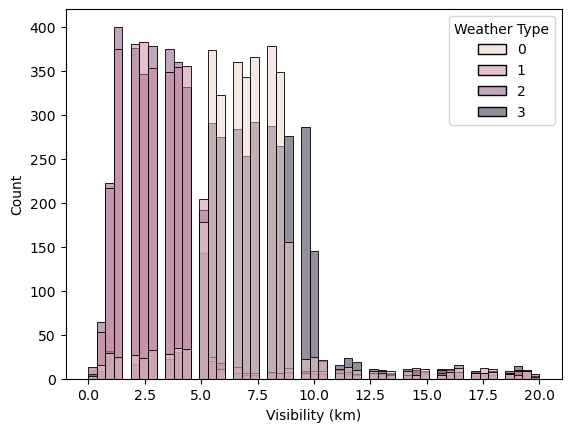

In [83]:
sns.histplot(data=no_outlier , x= no_outlier['Visibility (km)'] , hue=no_outlier['Weather Type'])
plt.show()

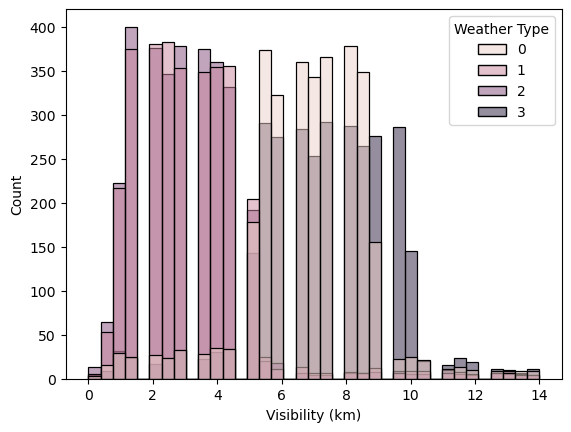

In [84]:
sns.histplot(data=no_outliers , x= no_outliers['Visibility (km)'] , hue=no_outliers['Weather Type'])
plt.show()

In [85]:
df2 = no_outliers.copy()
df2.describe()

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type
count,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000
mean,0.186405,0.194342,0.187348,0.431906,0.267033,0.366758,0.366208,18.832770,69.131631,9.868291,53.321572,1.996778,1005.797400,3.885108,5.115796,1.491866
std,0.389448,0.395709,0.390206,0.495361,0.442427,0.481939,0.481786,16.423511,19.970610,6.930328,32.015084,1.011987,32.405301,3.780004,2.738105,1.117310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.000000,20.000000,0.000000,0.000000,0.000000,800.230000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,58.000000,5.000000,19.000000,2.000000,995.100000,1.000000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,70.000000,9.000000,58.000000,2.000000,1007.550000,3.000000,5.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,30.000000,84.000000,13.500000,82.000000,3.000000,1016.510000,6.000000,7.500000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,109.000000,48.500000,109.000000,3.000000,1199.210000,14.000000,14.000000,3.000000


In [86]:
pressure_25 = df2['Atmospheric Pressure'].quantile(.25)
pressure_75 = df2['Atmospheric Pressure'].quantile(.75)
pressure_iqr = pressure_75 - pressure_25
pressure_upper = pressure_75 + (1.5*pressure_iqr)
pressure_lower = pressure_25 - (1.5*pressure_iqr)
pressure_outliers = df2[(df2['Atmospheric Pressure']>pressure_upper) |
                        (df2['Atmospheric Pressure']<pressure_lower)][['Season_Autumn','Season_Spring','Season_Summer'
    ,'Season_Winter','Location_coastal','Location_inland','Location_mountain','Temperature','Humidity',
    'Wind Speed','Precipitation (%)','Cloud Cover','Atmospheric Pressure','UV Index','Visibility (km)'
    ,'Weather Type']]
pressure_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 10 to 13196
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season_Autumn         642 non-null    uint8  
 1   Season_Spring         642 non-null    uint8  
 2   Season_Summer         642 non-null    uint8  
 3   Season_Winter         642 non-null    uint8  
 4   Location_coastal      642 non-null    uint8  
 5   Location_inland       642 non-null    uint8  
 6   Location_mountain     642 non-null    uint8  
 7   Temperature           642 non-null    float64
 8   Humidity              642 non-null    int64  
 9   Wind Speed            642 non-null    float64
 10  Precipitation (%)     642 non-null    float64
 11  Cloud Cover           642 non-null    int32  
 12  Atmospheric Pressure  642 non-null    float64
 13  UV Index              642 non-null    int64  
 14  Visibility (km)       642 non-null    float64
 15  Weather Type        

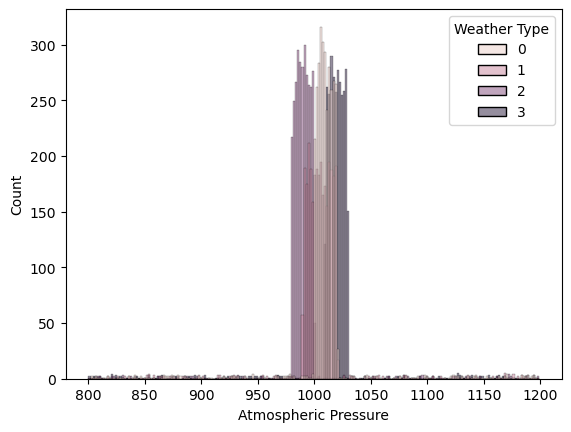

In [87]:
sns.histplot(data=df2 , x= df2['Atmospheric Pressure'] , hue=df2['Weather Type'])
plt.show()

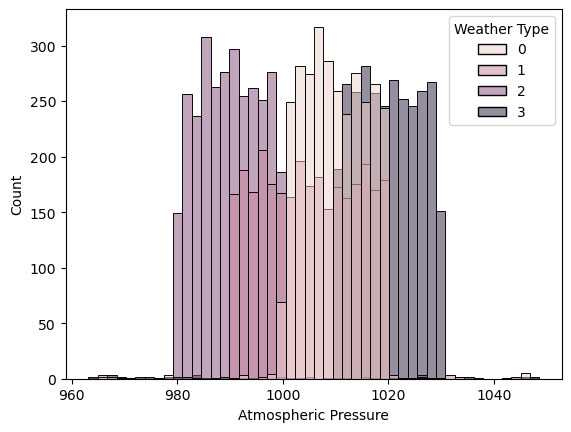

In [88]:
df4 = df2[(df2['Atmospheric Pressure']>pressure_lower) &
          (df2['Atmospheric Pressure']<pressure_upper)]
sns.histplot(data=df4 , x= df4['Atmospheric Pressure'] , hue=df4['Weather Type'])
plt.show()

In [89]:
df4.head()

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,0,0,0,1,0,1,0,14.0,73,9.5,82.0,3,1010.82,2,3.5,1
1,0,1,0,0,0,1,0,39.0,96,8.5,71.0,3,1011.43,7,10.0,0
2,0,1,0,0,0,0,1,30.0,64,7.0,16.0,0,1018.72,5,5.5,3
3,0,1,0,0,1,0,0,38.0,83,1.5,82.0,0,1026.25,7,1.0,3
4,0,0,0,1,0,0,1,27.0,74,17.0,66.0,2,990.67,1,2.5,1


In [90]:
x = df4.drop('Weather Type',axis=1)
y = df4['Weather Type']

In [91]:
len(x)
len(y)

12083

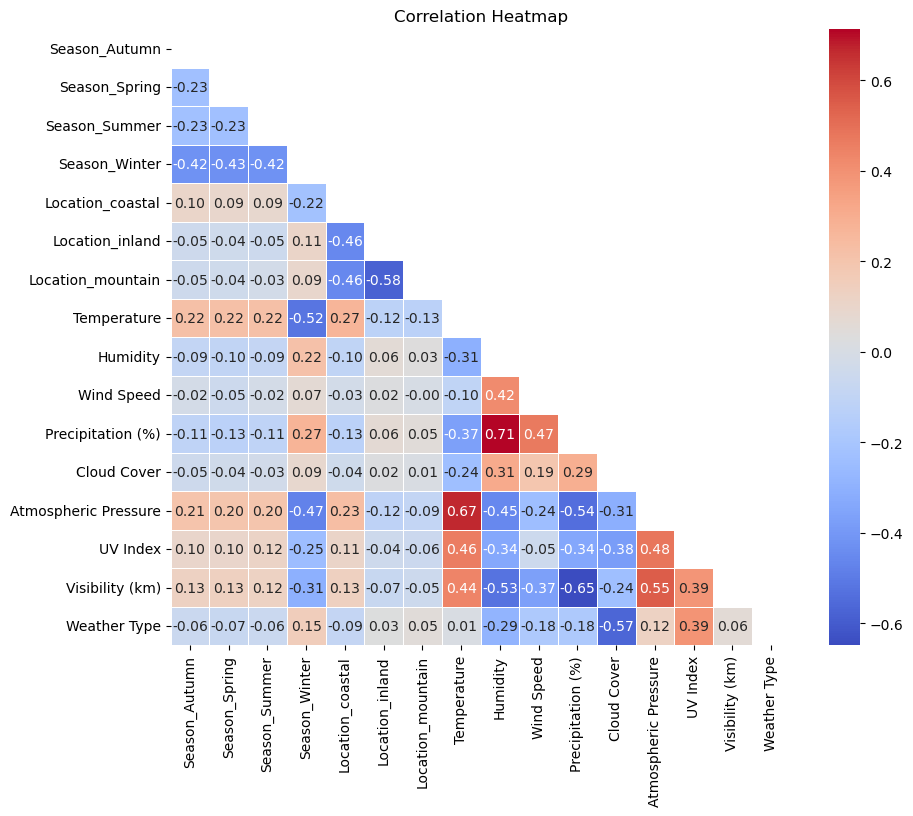

In [92]:
mask2 = np.triu(np.ones_like(df4.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr(), mask=mask2, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()
plt.show()

Model Selection & Tunning The Params

In [37]:
model_params = {
    'Decision_tree':{
        'model':DecisionTreeClassifier() , 
        'params':{
            'criterion' : ["gini", "entropy", "log_loss"],
            'splitter' : ["best", "random"]
        } },
    'Random_Forest':{
        'model':RandomForestClassifier(),
        'params':{
             'n_estimators': [10,15,20,50,100],
              'criterion' : ["gini", "entropy", "log_loss"]
             } },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors' :[3,5,10,15,20],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}},
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.1,1,5,10,15],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto']
            }}
    
}

In [105]:
scores=[]
for m_name ,m_param in model_params.items():
     model = GridSearchCV(m_param['model'],m_param['params'],cv=5,return_train_score=False)
     model.fit(x,y)
     scores.append({
         'model_name':m_name,
         'best_score':model.best_score_,
         'best_params':model.best_params_
     })
scores
pd.DataFrame(scores)

In [93]:
df4 = df4.copy()
df4['Weather State'] = df['Weather Type']
df4.head()

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Weather State
0,0,0,0,1,0,1,0,14.0,73,9.5,82.0,3,1010.82,2,3.5,1,Rainy
1,0,1,0,0,0,1,0,39.0,96,8.5,71.0,3,1011.43,7,10.0,0,Cloudy
2,0,1,0,0,0,0,1,30.0,64,7.0,16.0,0,1018.72,5,5.5,3,Sunny
3,0,1,0,0,1,0,0,38.0,83,1.5,82.0,0,1026.25,7,1.0,3,Sunny
4,0,0,0,1,0,0,1,27.0,74,17.0,66.0,2,990.67,1,2.5,1,Rainy


Splitting The Data

In [94]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Random Forest Model

In [95]:
rf_model=RandomForestClassifier(criterion='entropy', n_estimators=50)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [96]:
rf_model.score(x_test,y_test)

0.9739346297062474

Cheeking The performance Manually

In [97]:
rf_model.predict([[0,1,0,0,0,0,1,28.0,54,15.0,12.0,0,900.86,0,40]])

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3])

In [98]:
from sklearn.metrics import classification_report
y_predicted = rf_model.predict(x_test)
classification_report = classification_report(y_test,y_predicted)
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       629
           1       0.97      0.97      0.97       612
           2       0.99      0.99      0.99       610
           3       0.99      0.97      0.98       566

    accuracy                           0.97      2417
   macro avg       0.97      0.97      0.97      2417
weighted avg       0.97      0.97      0.97      2417



Cheeking The overfitting

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_train_predicted = rf_model.predict(x_train)
accuracy_scores_train = accuracy_score(y_train,y_train_predicted)
accuracy_scores_train

1.0

In [100]:
accuracy_scores_test = accuracy_score(y_test,y_predicted)
accuracy_scores_test

0.9739346297062474

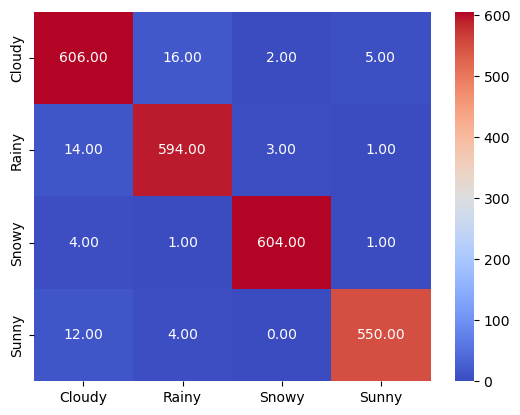

In [101]:
labels =["Cloudy",'Rainy','Snowy','Sunny']
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm , annot=True , cmap='coolwarm' ,fmt='.2f',
                   xticklabels=labels , yticklabels=labels)
plt.show()

In [104]:
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming your trained model is already available as rf_model

# Define the class-to-label mapping
class_mapping = {0: "Cloudy", 1: "Rainy", 2: "Snowy", 3: "Sunny"}

# Define options for dropdowns
seasons = ["Autumn", "Spring", "Summer", "Winter"]
locations = ["Coastal", "Inland", "Mountain"]

# Function to create a custom dialog
def show_custom_dialog(message):
    dialog = tk.Toplevel(window)
    dialog.title("Prediction Result")
    dialog.geometry("300x150")
    dialog.configure(bg="#1E1E1E")
    
    # Center the dialog on the screen
    window_width = 300
    window_height = 150
    screen_width = dialog.winfo_screenwidth()
    screen_height = dialog.winfo_screenheight()
    x = (screen_width / 2) - (window_width / 2)
    y = (screen_height / 2) - (window_height / 2)
    dialog.geometry(f'{window_width}x{window_height}+{int(x)}+{int(y)}')
    
    # Add padding
    padding = 10
    
    # Create a frame for the content
    frame = tk.Frame(dialog, bg="#1E1E1E")
    frame.pack(expand=True, fill='both', padx=padding, pady=padding)
    
    label = tk.Label(frame, text=message, bg="#1E1E1E", fg="white", font=('Arial', 14), wraplength=250)
    label.pack(pady=(padding, 10))
    
    ok_button = tk.Button(frame, text="OK", command=dialog.destroy, bg='#1E90FF', fg='white', font=('Arial', 12), relief='flat', padx=10, pady=5)
    ok_button.pack(pady=10)
    
    dialog.transient(window)  # Ensure the dialog stays on top of the main window
    dialog.grab_set()  # Make sure the dialog is modal
    window.wait_window(dialog)  # Wait for the dialog to be closed

# Function to predict weather type
def predict_weather():
    try:
        # Retrieve selected values from the GUI
        season = season_var.get()
        location = location_var.get()

        # Convert season and location to numerical values
        season_values = [1 if season == s else 0 for s in seasons]
        location_values = [1 if location == l else 0 for l in locations]

        # Gather the remaining feature values
        other_features = [
            float(entry_temperature.get()),
            float(entry_humidity.get()),
            float(entry_wind_speed.get()),
            float(entry_precipitation.get()),
            float(entry_cloud_cover.get()),
            float(entry_atmospheric_pressure.get()),
            float(entry_uv_index.get()),
            float(entry_visibility.get())
        ]
        
        # Combine all features
        features = season_values + location_values + other_features
        
        # Reshape input to match the expected input format for the model
        features = np.array(features).reshape(1, -1)
        
        # Make a prediction
        predicted_class = rf_model.predict(features)[0]
        
        # Map the numeric prediction to the weather type
        predicted_label = class_mapping[predicted_class]
        
        # Show the result in a custom dialog
        show_custom_dialog(f"The predicted weather today is:( {predicted_label} )")
    
    except ValueError:
        show_custom_dialog("Please enter valid numerical values for all fields.")

# Create the main window
window = tk.Tk()
window.title("Weather Type Predictor")
window.geometry("400x650")
window.configure(bg="#121212")  # Dark background color

# Create a frame for content with padding
content_frame = tk.Frame(window, bg="#1E1E1E")
content_frame.place(x=20, y=20, width=360, height=610)

# Define modern font and button style
font_style = ('Arial', 12)
button_style = {'bg': '#1E90FF', 'fg': 'white', 'font': font_style, 'relief': 'flat', 'padx': 10, 'pady': 5}
entry_style = {'bg': '#333333', 'fg': 'white', 'font': font_style, 'bd': 1, 'relief': 'solid'}

# Create dropdown menus for season and location
tk.Label(content_frame, text="Season:", bg="#1E1E1E", fg="white", font=font_style).grid(row=0, column=0, padx=10, pady=5, sticky='w')
season_var = tk.StringVar(window)
season_var.set(seasons[0])  # set default value
season_menu = ttk.Combobox(content_frame, textvariable=season_var, values=seasons, state='readonly', font=font_style, background="#333333", foreground="white")
season_menu.grid(row=0, column=1, padx=10, pady=5, sticky='ew')

tk.Label(content_frame, text="Location:", bg="#1E1E1E", fg="white", font=font_style).grid(row=1, column=0, padx=10, pady=5, sticky='w')
location_var = tk.StringVar(window)
location_var.set(locations[0])  # set default value
location_menu = ttk.Combobox(content_frame, textvariable=location_var, values=locations, state='readonly', font=font_style, background="#333333", foreground="white")
location_menu.grid(row=1, column=1, padx=10, pady=5, sticky='ew')

# Create labels and entries for remaining features
features = [
    ("Temperature:", "entry_temperature"),
    ("Humidity:", "entry_humidity"),
    ("Wind Speed:", "entry_wind_speed"),
    ("Precipitation (%):", "entry_precipitation"),
    ("Cloud Cover:", "entry_cloud_cover"),
    ("Atmospheric Pressure:", "entry_atmospheric_pressure"),
    ("UV Index:", "entry_uv_index"),
    ("Visibility (km):", "entry_visibility")
]

for idx, (label_text, var_name) in enumerate(features):
    tk.Label(content_frame, text=label_text, bg="#1E1E1E", fg="white", font=font_style).grid(row=2+idx, column=0, padx=10, pady=5, sticky='w')
    entry = tk.Entry(content_frame, **entry_style)
    entry.grid(row=2+idx, column=1, padx=10, pady=5, sticky='ew')
    globals()[var_name] = entry

# Create a button to predict the weather type
predict_button = tk.Button(content_frame, text="Predict Weather Type", command=predict_weather, **button_style)
predict_button.grid(row=len(features)+2, column=0, columnspan=2, padx=10, pady=20)

# Adjust row and column weights
content_frame.grid_rowconfigure(0, weight=1)
content_frame.grid_rowconfigure(1, weight=1)
for i in range(2, len(features)+2):
    content_frame.grid_rowconfigure(i, weight=1)

content_frame.grid_columnconfigure(1, weight=1)

# Start the GUI event loop
window.mainloop()


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
